Лабораторная работа 4

Сахаровой Дарьи, вариант 17


Z - ПОЛ (1-жен, 0-муж)

gamma = 0.98

alfa = 0.02

пол,a,b = 1,7,11

критерии проверки на нормальность - Д-Агостино и Джара-Бэра

Признаки кластеризации ирисов - sepal width (cm), petal length (cm)


ЧАСТЬ 1

ЗАДАНИЕ 1

In [126]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression
from scipy.stats import normaltest, jarque_bera
import statsmodels.api as sm
from scipy import stats


In [127]:
# зависимость зарплаты от пола
file_path = 'LAB_4_DATA_2023.xlsx'
df = pd.read_excel(file_path)

selected_columns = df.iloc[:, [2, 3]]
selected_columns.head()

,"ПОЛ (1-жен, 0- муж)",Зарплата (долл. в час)
0,0,53.410000
1,0,8.000000
2,0,24.000000
3,0,29.500000
4,0,32.049999


In [128]:
# строим линейную регрессию и оцениваем ее параметры

X = selected_columns['ПОЛ (1-жен, 0- муж)'].values.reshape(-1, 1)
Y = selected_columns['Зарплата (долл. в час)'].values

model = LinearRegression()
model.fit(X, Y)

intercept = model.intercept_
slope = model.coef_[0]

(intercept, slope)

(23.114481440297777, -6.9565184345970374)

Зарплата = 23 - 7 * ПОЛ

=> у женщин (пол = 1) зарплата меньше

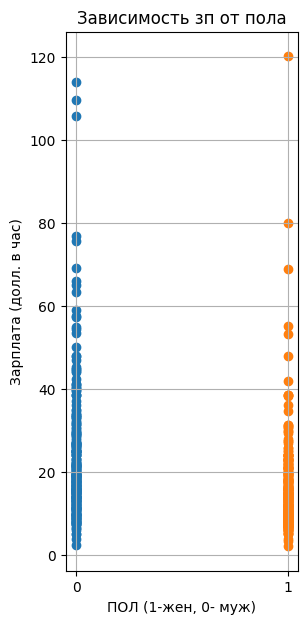

In [129]:
# визуализация
plt.figure(figsize=(3, 7))
axes = plt.axes()
plt.title('Зависимость зп от пола')
x_lable='ПОЛ (1-жен, 0- муж)'
y_lable='Зарплата (долл. в час)'
axes.set_xlabel(x_lable)             
axes.set_ylabel(y_lable)  
for c, rows in df.groupby('ПОЛ (1-жен, 0- муж)'):
    plt.scatter(rows[x_lable], rows[y_lable])
plt.grid()
# Устанавливаем только значения 0 и 1 на оси абсцисс
plt.xticks([0, 1])
plt.show()

In [130]:
# оценки параметров
#  вычисляем средние значения ЗП для каждого пола
class_feature_means = pd.DataFrame()
for c, rows in selected_columns.groupby('ПОЛ (1-жен, 0- муж)'):
    class_feature_means[c] = rows.mean()
print("Средние значения:\n",class_feature_means)
print("\nСредние зарплаты женского пола ниже на +- 7 единиц")

Средние значения:
                                 0          1
ПОЛ (1-жен, 0- муж)      0.000000   1.000000
Зарплата (долл. в час)  23.114481  16.157963

Средние зарплаты женского пола ниже на +- 7 единиц


In [131]:
# F-тест для проверки модели
f_statistic, p_value = f_regression(X, Y)

# Выводим результаты
print("F-статистика:", f_statistic[0])
print("p-value:", p_value[0])

# Проверяем значимость p-значения (alfa = 0.02)
if p_value[0] < 0.02:
    print("Модель обладает статистически значимой объясняющей способностью.")
else:
    print("Модель не обладает статистически значимой объясняющей способностью.")

# Вывод коэффициента детерминации
print('\nКоэффициент детерминации:', model.score(X, Y))

# Коэфф. детерминации определяет, насколько модель линейной регрессии соответствует 
# данным, на которых она построена. 1 - модель идеальна
print("-> данная модель слабо объясняет изменения в зависимой переменной т.к. коэффициент детерминации мал")


F-статистика: 33.322802073786846
p-value: 1.3200009108490948e-08
Модель обладает статистически значимой объясняющей способностью.

Коэффициент детерминации: 0.058325699504434114
-> данная модель слабо объясняет изменения в зависимой переменной т.к. коэффициент детерминации мал


In [132]:
# Проверка остатков (ошибок) регрессии на нормальность

y_predict = model.predict(X)
errors=Y-y_predict 
print("SUM_errors = ",sum(errors))
rez=jarque_bera(errors)
print(rez)
rez2 = normaltest(errors)
print(rez2)

ESS=sum(errors**2) # ESS = Errors Sum of Squares - сумму квадратов остатков (ошибок) регрессии
print('\nESS = ',ESS )
RSS=sum((y_predict-np.mean(y_predict)) **2) # RSS = Regression Sum of Squares -  регрессионную сумму квадратов
print('RSS = ',RSS )
TSS=sum((Y-np.mean(Y)) **2) # TSS = Total Sum of Squares -  полную сумму квадратов
print('TSS = ',TSS )
R2=1-ESS/TSS  
print('\nВысчитанный по формулам R2 = ',R2)


print("\nОчень маленькие p-значения -> остатки модели не распределены нормально. \nMодель может быть недостаточно адекватной для описания данных.")

SUM_errors =  6.146194664324867e-13
SignificanceResult(statistic=5688.747825580847, pvalue=0.0)
NormaltestResult(statistic=390.9015117083931, pvalue=1.3086251081447052e-85)

ESS =  105477.15598891099
RSS =  6533.075078669907
TSS =  112010.23106758097

Высчитанный по формулам R2 =  0.058325699504434336

Очень маленькие p-значения -> остатки модели не распределены нормально. 
Mодель может быть недостаточно адекватной для описания данных.


ЧАСТЬ 2

In [133]:
selected_columns_2 = df.iloc[:, 0:4]
selected_columns_2.head()

,СТАЖ РАБОТЫ (лет),"ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет)","ПОЛ (1-жен, 0- муж)",Зарплата (долл. в час)
0,22.384615,12,0,53.410000
1,8.903846,12,0,8.000000
2,13.250000,15,0,24.000000
3,18.250000,13,0,29.500000
4,13.769231,18,0,32.049999


In [134]:
X_2 = selected_columns_2.iloc[:, :-1]  
Y_2 = selected_columns_2.iloc[:, -1]  

model_2 = LinearRegression()
model_2.fit(X_2, Y_2)

intercept_2 = model_2.intercept_
coefficients_2 = model_2.coef_

(intercept_2, coefficients_2)


(-19.691947095344787, array([ 0.4056772 ,  2.59113732, -5.90905023]))

Зарплата= −19.69 + 0.41 * Стаж работы + 2.59 * Время на обучение − 5.91 * Пол

In [135]:
y_predict_2 = model_2.predict(X_2)
errors_2=Y_2-y_predict_2 
print("SUM_errors = ",sum(errors_2))
rez_2=jarque_bera(errors_2)
print(rez_2)
rez2_2 = normaltest(errors_2)
print(rez2_2)

print("\nОчень маленькие p-значения -> остатки регрессии не распределены нормально\nни по одному признаку.")

ESS_2=sum(errors_2**2)
print('\nESS = ',ESS_2 )
RSS_2=sum((y_predict_2-np.mean(y_predict_2)) **2)
print('RSS = ',RSS_2 )
TSS_2=sum((Y_2-np.mean(Y)) **2)
print('TSS = ',TSS_2 )
R2_2=1-ESS_2/TSS_2
print('\nВысчитанный по формулам R2 = ',R2_2)

SUM_errors =  -2.042810365310288e-13
SignificanceResult(statistic=7226.888780316278, pvalue=0.0)
NormaltestResult(statistic=404.7522546494346, pvalue=1.2857739834288093e-88)

Очень маленькие p-значения -> остатки регрессии не распределены нормально
ни по одному признаку.

ESS =  85032.74975739743
RSS =  26977.481310183397
TSS =  112010.23106758097

Высчитанный по формулам R2 =  0.2408483676272999


С каждым годом стажа работы -> зарплата увеличивается на 0.41 доллара в час, с каждым годом обучения -> на 2.59 доллара в час, а женщины в среднем -> на 5.91 доллара в час меньше.

In [136]:
class_feature_means = pd.DataFrame()
for c, rows in selected_columns_2.groupby('ПОЛ (1-жен, 0- муж)'):
    class_feature_means[c] = rows.mean()
print("Средние значения:\n",class_feature_means)

print("\nесли стаж работы увеличится на 2 года -> ЗП на 0.82")
print("\nесли доп. год обучения -> ЗП вырастет на 2.59")

Средние значения:
                                                  0          1
СТАЖ РАБОТЫ (лет)                        17.872009  15.928704
ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет)  13.722222  13.622222
ПОЛ (1-жен, 0- муж)                       0.000000   1.000000
Зарплата (долл. в час)                   23.114481  16.157963

если стаж работы увеличится на 2 года -> ЗП на 0.82

если доп. год обучения -> ЗП вырастет на 2.59


In [137]:
# проверка модели используя F-test

f_statistic_multi, p_value_multi = f_regression(X_2, Y_2)
print("Значения статистики",f_statistic_multi, "\nЗначения p-value ",p_value_multi)
print("\nВывод - только у СТАЖА РАБОТЫ p-value > 0.02 - он не является значимым.\nВ целом же модель обладает имеет высокую объясняющую способность.")

# Вывод коэффициента детерминации
print('\nКоэффициент детерминации:', model_2.score(X_2, Y_2))

# Коэфф. детерминации определяет, насколько модель линейной регрессии соответствует 
# данным, на которых она построена. 1 - модель идеальна
print("-> данная модель гораздо лучше объясняет изменения в зависимой переменной")

Значения статистики [  2.98343217 112.14961239  33.32280207] 
Значения p-value  [8.46946525e-02 6.22344550e-24 1.32000091e-08]

Вывод - только у СТАЖА РАБОТЫ p-value > 0.02 - он не является значимым.
В целом же модель обладает имеет высокую объясняющую способность.

Коэффициент детерминации: 0.24084836762729878
-> данная модель гораздо лучше объясняет изменения в зависимой переменной


In [138]:
# найдем подробную информацию о регрессионной модели, включая коэффициенты, 
# стандартные ошибки, статистики t и p
X_2_sm = sm.add_constant(X_2)
model_sm = sm.OLS(Y_2, X_2_sm).fit()

# Выводим результаты регрессии
print(model_sm.summary())
print("\n\nВывод - коэффициент для переменной ПОЛ равен -5.9091, \nа p-значение (P>|t|) равно 0.000 < 0.02 -> \nкоэффициент статистически значим ->  \nразличия в зарплатах между мужчинами и женщинами статистически значимы \nпри прочих равных условиях ")
print("\nПолная дискриминация!!")

                              OLS Regression Results                              
Dep. Variable:     Зарплата (долл. в час)   R-squared:                       0.241
Model:                                OLS   Adj. R-squared:                  0.237
Method:                     Least Squares   F-statistic:                     56.68
Date:                    Mon, 18 Dec 2023   Prob (F-statistic):           7.74e-32
Time:                            10:36:29   Log-Likelihood:                -2132.2
No. Observations:                     540   AIC:                             4272.
Df Residuals:                         536   BIC:                             4290.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

ЧАСТЬ 2

In [139]:
# Проверьте, отражает ли полученное при оценке регрессии значение 
# коэффициента при факторе СТАЖ РАБОТЫ истинную зависимость, или же оно появилось случайно? 

# Заново строим линейную регрессию и ищем ее коэффициенты
columns_all = df.iloc[:, 0:4]
X_2_all = columns_all[['СТАЖ РАБОТЫ (лет)', 'ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет)', 'ПОЛ (1-жен, 0- муж)']].values 
Y_2_all = np.array(columns_all['Зарплата (долл. в час)'])  
Y_2_all = Y_2_all.reshape((-1, 1))
model_2_all = LinearRegression()
model_2_all.fit(X_2_all, Y_2_all)
b_0_hat = model_2_all.intercept_[0]
b_1_hat = model_2_all.coef_[0]

# Извлекаем значения признаков
x1 = np.array(columns_all['СТАЖ РАБОТЫ (лет)'])
x2 = np.array(columns_all['ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ (лет)'])
x3 = np.array(columns_all['ПОЛ (1-жен, 0- муж)'])

errors = []
# Вычисляем остатки вручную
for i in range(len(Y_2_all)):
    errors.append(Y_2_all[i][0] - (b_0_hat + b_1_hat[0] * x1[i] + b_1_hat[1] * x2[i] + b_1_hat[2] * x3[i]))

# Вычисление суммы квадратов ошибок
tmp = 0
for error in errors:
    tmp += error ** 2

# Вычисление стандартного отклонения одного из предикторов
sigma_x1 = np.std(X_2_all[:, 0])

# Вычисление стандартной ошибки коэффициента наклона
tmp /= (len(errors) - len(b_1_hat) - 1)
se = np.sqrt(tmp)
b1_std_error = se / (np.sqrt(len(errors)) * sigma_x1)

# Вычисление t-статистики
t1 = b_1_hat[0] / b1_std_error

# Вычисление критического значения t-статистики c alfa=0.02
t_critical = stats.t.ppf(0.02, df=len(errors) - len(b_1_hat) - 1)
t1 = abs(t1)
print("Критическое значение = ", t_critical, "\nВычисленная t-статистика", abs(t1))

if abs(t1) < t_critical:
    print(f'Коэффициент статистически незначим')
else:
    print(f'Коэффициент статистически значим')

print("\nВывод:\nЭто означает, что коэффициент при СТАЖ РАБОТЫ (лет) статистически значим \nи его значение возникло не случайно")

Критическое значение =  -2.058759043823832 
Вычисленная t-статистика 3.315117306572352
Коэффициент статистически значим

Вывод:
Это означает, что коэффициент при СТАЖ РАБОТЫ (лет) статистически значим 
и его значение возникло не случайно


In [140]:
# Проверьте, отражает ли полученное при оценке регрессии значение коэффициента  при факторе  ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ,
#  истинную зависимость, или же оно появилось случайно? 

# Вычисление стандартной ошибки коэффициента
sigma_x2 = np.std(X_2_all[:, 1])
b2_std_error = se / (np.sqrt(len(errors)) * sigma_x2)
t2 = b_1_hat[1] / b2_std_error
t_critical = stats.t.ppf(0.02 / 2, df=len(errors) - len(b_1_hat) - 1)

print("Критическое значение = ", t_critical, "\nВычисленная t-статистика", abs(t2))
# Проверка статистической значимости коэффициента
if abs(t2) < t_critical:
    print('Коэффициент статистически незначим')
else:
    print('Коэффициент статистически значим')

print("\nВывод:\nЭто означает, что коэффициент при ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ статистически значим \nи его значение возникло не случайно")

Критическое значение =  -2.3333250547019966 
Вычисленная t-статистика 11.64642410680115
Коэффициент статистически значим

Вывод:
Это означает, что коэффициент при ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ статистически значим 
и его значение возникло не случайно


In [141]:
# С надежностью  гамма постройте доверительные интервалы для 
# теоретических  коэффициентов регрессии 
print("ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ:\n")
gamma=0.98
# Вычисление t-критического значения
t_g = stats.t.ppf((1 + gamma) / 2, df=len(errors) - len(b_1_hat) - 1)

b0_std_error = 0
std_errors = []

# Цикл для каждого коэффициента
for i in range(3):
    avg_x2 = np.mean(X_2_all[:, i] ** 2)
    sigma_x = np.std(X_2_all[:, i])

    # Вычисление дельты
    delta = t_g * se / (np.sqrt(len(errors)) * sigma_x)
    print(f'Доверительный интервал для b{i + 1}: [{b_1_hat[i] - delta}, {b_1_hat[i] + delta}]')

    # Добавление части стандартной ошибки коэффициента b0
    b0_std_error += se * np.sqrt(avg_x2) / (np.sqrt(len(errors)) * sigma_x)
    # стандартная ошибка коэффициента 
    std_errors.append(se / (np.sqrt(len(errors)) * sigma_x))

# Вычисление дельты для b0
delta_b0 = t_g * b0_std_error

print(f'Доверительный интервал для b0: [{b_0_hat - delta_b0}, {b_0_hat + delta_b0}]')

ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ:

Доверительный интервал для b1: [0.12014378192966751, 0.6912106160976843]
Доверительный интервал для b2: [2.072010973641162, 3.1102636737076716]
Доверительный интервал для b3: [-8.438459335948606, -3.379641132113098]
Доверительный интервал для b0: [-33.67850909928059, -5.705385091408983]


In [142]:
#  С надежностью гамма найдите интервальную оценку прогнозной ЗАРПЛАТЫ работника , с  
# указанной в варианте гендерной принадлежностью, 
# если  СТАЖ РАБОТЫ составляет а лет, а ВРЕМЯ, ЗАТРАЧЕННОЕ НА ОБРАЗОВАНИЕ, равно b годам.

a=7 # стаж работы
b=11 # время образования
gender=1 # мужчины

# Вычисление стандартной ошибки 
y_std_error = np.sqrt(b0_std_error**2 + std_errors[0]**2 * a**2 + std_errors[1]**2 * b**2)

delta = t_g * y_std_error
y_pred = b_0_hat + b_1_hat[0] * a + b_1_hat[1] * b + b_1_hat[2] * gender

# Вывод доверительного интервала для y
print(f'Доверительный интервал для y: [{y_pred - delta}, {y_pred + delta}]')

Доверительный интервал для y: [-9.497755733900755, 20.98026298217811]


ЧАСТЬ 3

c:\Users\darya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


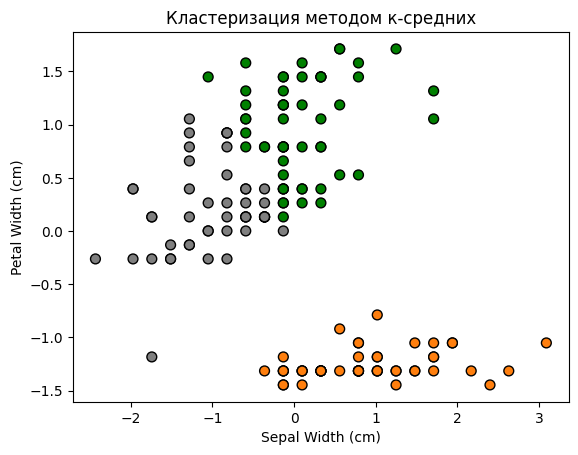

In [143]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Загрузка данных и создание DataFrame
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
X = data[["sepal width (cm)", "petal width (cm)"]]

# Масштабирование признаков
X_scaled = StandardScaler().fit_transform(X)

# Кластеризация методом к-средних
kmeans = KMeans(n_clusters=3, random_state=42)
data["cluster"] = kmeans.fit_predict(X_scaled)

# Создаем список цветов для каждого кластера
custom_colors = ['#ff7f0e', 'green', '#7f7f7f']

# Используем список цветов для кластеров
plt.scatter(
    X_scaled[:, 0], X_scaled[:, 1],
    c=[custom_colors[i] for i in data["cluster"]],
    edgecolors='k',
    s=50
) 
plt.title("Кластеризация методом к-средних")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()